## DIstributed Shared Nearest Neighbor experiments

In [1]:
if length(workers()) > 1
    println("Removing previous workers...")
    rmprocs(workers())
end


include("/workspace/distributed_clustering/julia/src/dsnn_IO.jl")
# Grancoloso
#addprocs(["158.251.93.5:3308","158.251.93.5:3307","158.251.93.5:3306","158.251.93.5:3305",])
#addprocs(["158.251.93.5:3308","158.251.93.5:3307","158.251.93.5:3306","158.251.93.5:3305",
#        "158.251.93.5:3304","158.251.93.5:3303","158.251.93.5:3302","158.251.93.5:3301",])

# Coloso
#addprocs(["158.251.88.180:3301","158.251.88.180:3302","158.251.88.180:3303","158.251.88.180:3304",])

overall_parameters = DSNN_IO.read_configuration("src/experiments_config");
addprocs(overall_parameters["master.nodelist"]);


@everywhere include("/workspace/distributed_clustering/julia/src/dsnn_IO.jl")
@everywhere include("/workspace/distributed_clustering/julia/src/dsnn_KNN.jl")
@everywhere include("/workspace/distributed_clustering/julia/src/dsnn_SNN.jl")
@everywhere include("/workspace/distributed_clustering/julia/src/dsnn_Master.jl")

using Graphs
using CSV

assert(length(workers()) == length(overall_parameters["master.nodelist"]))

stdin: is not a tty
stdin: is not a tty
stdin: is not a tty
stdin: is not a tty
 overwritten at /root/.julia/v0.6/Graphs/src/common.jl:61 overwritten at /root/.julia/v0.6/Graphs/src/common.jl:17.
.
Graphs, V, Base..DictEdge{{StringV}, Any where }V) in module Graphs at /root/.julia/v0.6/Graphs/src/common.jl:73}) overwritten(WARNING: Method definition  at /root/.julia/v0.6/Graphs/src/common.jl:84.
(::TypeInt64, {V, Graphs.TargetIteratorV){G in module Graphs,  at /root/.julia/v0.6/Graphs/src/common.jl:55EList} overwritten where  at /root/.julia/v0.6/Graphs/src/common.jl:61EList.
 where G<:(Graphs.AbstractGraph{V, E} where E where V)})(G<:(Graphs.AbstractGraph{V, E} where E where V), EList) in module Graphs at /root/.julia/v0.6/Graphs/src/common.jl:124 overwritten at /root/.julia/v0.6/Graphs/src/common.jl:128.
AbstractGraph{ where V)V, }E})( where GE where V<:()}Graphs)(.G<:AbstractGraph(Graphs{V.AbstractGraph, {V, E}E} where  where EE where  where V)V, EList), WARNING: Method definition )

K}) where E where V)(Int64, , DMap) in module GraphsK) in module Graphs at /root/.julia/v0.6/Graphs/src/common.jl:13 at /root/.julia/v0.6/Graphs/src/breadth_first_visit.jl:107 overwritten at /root/.julia/v0.6/Graphs/src/breadth_first_visit.jl:111 overwritten at /root/.julia/v0.6/Graphs/src/common.jl:17.
.
, E} where E where V)})(G<:(Graphs.AbstractGraph{V, E} where E where V), EList) in module Graphs at /root/.julia/v0.6/Graphs/src/common.jl:142 overwritten at /root/.julia/v0.6/Graphs/src/common.jl:146.
)(G<:(Graphs.AbstractGraph{V, E} where E where V), DMap) in module Graphs at /root/.julia/v0.6/Graphs/src/breadth_first_visit.jl:107 overwritten at /root/.julia/v0.6/Graphs/src/breadth_first_visit.jl:111.


In [2]:
results = Dict{String,Any}();
DATA_PATH = overall_parameters["master.inputpath"];
DATA_LEN, DATA_DIM = DSNN_IO.get_dimensions_from_input_file(DATA_PATH);
partitions = DSNN_Master.generate_partitions(length(workers()), DATA_LEN); # N must be extracted from the data.

println("\n\n***********************************************************")
DSNN_Master.start(results, DATA_PATH, partitions, overall_parameters);
#storing final result
writedlm(@sprintf("%s.dsnnfinal.labels",DATA_PATH), results["stage2_labels"], "\n");



***********************************************************
[M] Starting Stage 1 (assignment distribution and corepoint identification)
	From worker 3:	[W] executing snn clustering with eps:0.9 and minpts:13
	From worker 2:	[W] executing snn clustering with eps:0.9 and minpts:13
	From worker 5:	[W] executing snn clustering with eps:0.9 and minpts:13
	From worker 4:	[W] executing snn clustering with eps:0.9 and minpts:13
[M] Joining worker's results of Stage 1
Amount of noisy data points detected by worker 4:472
Amount of noisy data points detected by worker 2:445
Amount of noisy data points detected by worker 3:424
Amount of noisy data points detected by worker 5:450
[M] Corepoints (218) and Samples (888)


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Int64}, ::Int64) at ./deprecated.jl:57
 [3] Type at /root/.julia/v0.6/Graphs/src/graph_visit.jl:44 [inlined]
 [4] connected_components(::Graphs.GenericAdjacencyList{Int64,UnitRange{Int64},Array{Array{Int64,1},1}}) at /root/.julia/v0.6/Graphs/src/connected_components.jl:20
 [5] start(::Dict{String,Any}, ::String, ::Array{Int64,1}, ::Dict{String,Any}) at /workspace/distributed_clustering/julia/src/dsnn_Master.jl:132
 [6] include_string(::String, ::String) at ./loading.jl:515
 [7] include_string(::Module, ::String, ::String) at /root/.julia/v0.6/Compat/src/Compat.jl:478
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /root/.julia/v0.6/IJulia/src/execute_request.jl:154
 [9] eventloop(::ZMQ.Socket) at /root/.julia/v0.6/IJulia/src/eventloop.jl:8
 [10] (::IJulia.##14#17)() at ./task.jl:335
while loading In[2], in expression starting on line 7


Num. connected components:1
[M] Retransmitting overall corepoints (Stage 2)...
	From worker 2:	[W] Labeling assigned instances from the oveall corepoints
	From worker 3:	[W] Labeling assigned instances from the oveall corepoints
	From worker 4:	[W] Labeling assigned instances from the oveall corepoints
	From worker 5:	[W] Labeling assigned instances from the oveall corepoints
[M] Joining Worker's results of Stage 2.
[M] Generating worker's final labelings...


[Only for small 2D data] Plotting corepoints and whole dataset



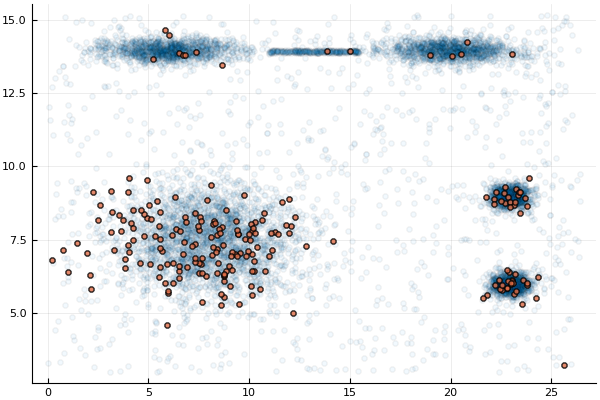

In [4]:
# Experimentation over the obtained corepoints
D = DSNN_IO.sparseMatFromFile(DATA_PATH, l2normalize=true);
real_labels = vec(readdlm(@sprintf("%s.labels",DATA_PATH), Int32));
Dw = D[:,results["stage1_corepoints"]];
cp_real_labels = real_labels[results["stage1_corepoints"]];

CSV.write(@sprintf("%s.corepoints.csv",DATA_PATH), DataFrames.DataFrame(full(transpose(Dw))), delim=' ',  header=false);
writedlm(@sprintf("%s.corepoints.labels",DATA_PATH), cp_real_labels, "\n");

snnmat, knnmat = DSNN_KNN.get_snnsimilarity(Dw, overall_parameters["corepoint.knn"], l2knng_path=overall_parameters["l2knng.path"]);

adj_mat = snnmat;
if overall_parameters["corepoint.use_snngraph"]
    snngraph = DSNN_KNN.get_snngraph(knnmat, snnmat);
    adj_mat = snngraph;
end

if size(Dw,1) == 2
    println("[Only for small 2D data] Plotting corepoints and whole dataset")
    using Plots
    pyplot()
    D_raw = DSNN_IO.sparseMatFromFile(DATA_PATH, l2normalize=false);

    colors = fill(1, size(D,2));
    colors[results["stage1_corepoints"]] = 2;
    plt = scatter(D_raw[1,:], D_raw[2,:], marker=(0.05,:o,4), legend=false, fmt = :png)
    scatter!(plt, D_raw[1,results["stage1_corepoints"]], D_raw[2,results["stage1_corepoints"]], marker=(0.8,:o,4), legend=false, fmt = :png)
end

In [36]:
# Applying SNN-Clustering overthe corepoints
@time begin
    println("Applying SNN-Clustering over the corepoints...");
    cp_results = DSNN_SNN.snn_clustering(overall_parameters["corepoint.eps"], overall_parameters["corepoint.minpts"], adj_mat);

    labels_found = fill(0, size(cp_results["labels"],1));
    for c in collect(1:size(cp_results["labels"],2))
        for i in cp_results["labels"][:,c].nzind
            labels_found[i] = cp_results["clusters"][c]; # extract the right assigned label name
        end
    end

    println("Num. Clusters found:",length(unique(labels_found)))
    if length(find(x->x<0, cp_results["clusters"])) > 0
        println(@sprintf("Percentage of noise:: %0.2f", 
                length(cp_results["labels"][:,1].nzind)/size(cp_results["labels"],1)))
    else
        println("Amount of noise: 0");
    end
    writedlm(@sprintf("%s.corepoints.snn.labels",DATA_PATH), labels_found, "\n");
end

# Applying Connected components
@time begin
    println("Applying Connected Components over the corepoints...");
    numpoints = size(Dw,2);
    println("Num. points:",numpoints);

    G = Graphs.simple_adjlist(numpoints, is_directed=false);
    for i in collect(1:numpoints)
        for j in adj_mat[:,i].nzind
            Graphs.add_edge!(G, i, j)
        end
    end

    cmps = Graphs.connected_components(G);

    println("Num. connected components:",length(cmps));
    labels_found = fill(-1, numpoints);
    for cmp_i in eachindex(cmps)
        for p in cmps[cmp_i]
            labels_found[p] = cmp_i;
        end
    end
    println("Num. Clusters found:",length(unique(labels_found)))
    writedlm(@sprintf("%s.corepoints.conncomps.labels",DATA_PATH), labels_found, "\n");

end

# Applying Maximal Clique to the corepoints
@time begin
    println("Applying Maximal Clique over the corepoints...");
    numpoints = size(Dw,2);
    println("Num. points:",numpoints);

    G = Graphs.simple_adjlist(numpoints, is_directed=false);
    for i in collect(1:numpoints)
        for j in adj_mat[:,i].nzind
            Graphs.add_edge!(G, i, j)
        end
    end

    cmps = Graphs.maximal_cliques(G);

    println("Num. Cliques:",length(cmps));
    labels_found = fill(-1, numpoints);
    for cmp_i in eachindex(cmps)
        for p in cmps[cmp_i]
            labels_found[p] = cmp_i;
        end
    end

    println("Num. Clusters found:",length(unique(labels_found)))
    writedlm(@sprintf("%s.corepoints.cliques.labels",DATA_PATH), labels_found, "\n");

end

# Applying Label propagation to the corepoints
@time begin
    println("Applying Label propagation over the corepoints...")
    using LightGraphs

    G = LightGraphs.Graph(numpoints)
    for i in collect(1:numpoints)
       for j in adj_mat[:, i].nzind
           if j > i 
               # maybe a threshold based on adj_mat[j,i] could be used !
               if ~LightGraphs.add_edge!(G, i, j)
                   println("[M] Error: Cannot add edge between vertices ",i," and ",j)
               end
           end
       end
    end
    labels_found, conv_history = LightGraphs.label_propagation(G);
    println("Num. Clusters found:",length(unique(labels_found)))
    writedlm(@sprintf("%s.corepoints.lblprop.labels",DATA_PATH), labels_found, "\n");

end


# Applying DBSCAN over the corepoints
@time begin
    println("Applying DBSCAN over the corepoints...");
    using Clustering

    #dbscan_cl = Clustering.dbscan(full(Dw), 0.1, min_neighbors=15);
    dbscan_cl = Clustering.dbscan(full(1.0 .- adj_mat), overall_parameters["corepoint.dbscan.eps"], overall_parameters["corepoint.dbscan.minpts"]);
    labels_found = dbscan_cl.assignments;
    println("Num. Clusters found:",length(unique(labels_found)))
    writedlm(@sprintf("%s.corepoints.dbscan.labels",DATA_PATH), labels_found, "\n");
end

println("\n########################################################\n")
run(`python src/evaluate_corepoint_files.py -i $DATA_PATH -f rst`)

Applying SNN-Clustering over the corepoints...
Num. Clusters found:16
Percentage of noise:: 0.02
  0.017541 seconds (6.86 k allocations: 582.580 KiB)
Applying Connected Components over the corepoints...
Num. points:218
Num. connected components:4
Num. Clusters found:4
  0.039930 seconds (19.31 k allocations: 974.156 KiB, 22.66% gc time)
Applying Maximal Clique over the corepoints...
Num. points:218
Num. Cliques:116
Num. Clusters found:65
  0.021012 seconds (49.03 k allocations: 4.914 MiB)
Applying Label propagation over the corepoints...

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Int64}, ::Int64) at ./deprecated.jl:57
 [3] Type at /root/.julia/v0.6/Graphs/src/graph_visit.jl:44 [inlined]
 [4] connected_components(::Graphs.GenericAdjacencyList{Int64,UnitRange{Int64},Array{Array{Int64,1},1}}) at /root/.julia/v0.6/Graphs/src/connected_components.jl:20
 [5] macro expansion at ./In[36]:36 [inlined]
 [6] macro expansion at ./util.jl:237 [inlined]
 [7] anonymous at ./<missing>:?
 [8] include_string(::String, ::String) at ./loading.jl:515
 [9] include_string(::Module, ::String, ::String) at /root/.julia/v0.6/Compat/src/Compat.jl:478
 [10] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /root/.julia/v0.6/IJulia/src/execute_request.jl:154
 [11] eventloop(::ZMQ.Socket) at /root/.julia/v0.6/IJulia/src/eventloop.jl:8
 [12] (::IJulia.##14#17)() at ./task.jl:335
while loading In[36], in expression starting on line 24



Num. Clusters found:9
  0.002845 seconds (13.75 k allocations: 794.172 KiB)
Applying DBSCAN over the corepoints...
Num. Clusters found:4
  0.066338 seconds (15.70 k allocations: 1.996 MiB)

########################################################

Evaluating over corepoints generated from data file /workspace/cure_large.dat
==============  =========  ===========  ==========
Method            V-Score          ARI         AMI
==============  =========  ===========  ==========
D-SNN (all)     0.0124602  -0.00842649  0.00645101
SNN             0.460728    0.129412    0.279149
Conn. Comps.    0.78012     0.7688      0.649448
Max Cliques     0.357826    0.0303278   0.122507
Label Prop.     0.512874    0.16249     0.353134
DBSCAN (julia)  0.763657    0.757242    0.642839
==============  =========  ===========  ==========


In [ ]:
l_methods = ["snn", "conncomps", "cliques", "lblprop", "dbscan"];
labels_found = fill(-1, (size(Dw,2),length(l_methods)));
for meth_i in collect(1:length(l_methods))
    meth = l_methods[meth_i];
    println("opening ",meth)
    println(meth," -> ",length(find(x->x<0, vec(readdlm(@sprintf("%s.corepoints.%s.labels",DATA_PATH, meth), Int32)))));
end

In [40]:
find(x->x<0, vec(readdlm(@sprintf("%s.corepoints.%s.labels",DATA_PATH, "snn"), Int32)))

2-element Array{Int64,1}:
  26
 217

opening snn
opening conncomps
opening cliques
opening lblprop
opening dbscan



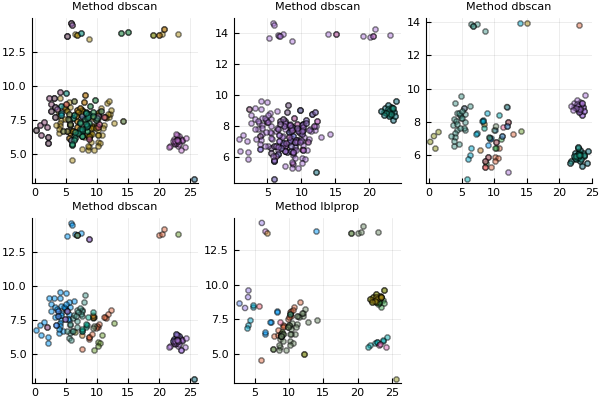

In [35]:
l_methods = ["snn", "conncomps", "cliques", "lblprop", "dbscan"];
labels_found = fill(-1, (size(Dw,2),length(l_methods)));
for meth_i in collect(1:length(l_methods))
    meth = l_methods[meth_i];
    println("opening ",meth)
    labels_found[:,meth_i] = vec(readdlm(@sprintf("%s.corepoints.%s.labels",DATA_PATH, meth), Int32));
end

Plots.scatter(D_raw[1,results["stage1_corepoints"]], D_raw[2,results["stage1_corepoints"]], layout=5, marker=(0.5,:o,4), group=labels_found[:,1], legend=false, fmt = :png, title=@sprintf("Method %s", l_methods[1]))
Plots.scatter!(D_raw[1,results["stage1_corepoints"]], D_raw[2,results["stage1_corepoints"]], titlefont = font(8), marker=(0.5,:o,4), group=labels_found[:,2], legend=false, fmt = :png, title=@sprintf("Method %s", l_methods[2]))
Plots.scatter!(D_raw[1,results["stage1_corepoints"]], D_raw[2,results["stage1_corepoints"]], titlefont = font(8), marker=(0.5,:o,4), group=labels_found[:,3], legend=false, fmt = :png, title=@sprintf("Method %s", l_methods[3]))
Plots.scatter!(D_raw[1,results["stage1_corepoints"]], D_raw[2,results["stage1_corepoints"]], titlefont = font(8), marker=(0.5,:o,4), group=labels_found[:,4], legend=false, fmt = :png, title=@sprintf("Method %s", l_methods[4]))
Plots.scatter!(D_raw[1,results["stage1_corepoints"]], D_raw[2,results["stage1_corepoints"]], titlefont = font(8), marker=(0.5,:o,4), group=labels_found[:,5], legend=false, fmt = :png, title=@sprintf("Method %s", l_methods[5]))

The _start_ method sets the value of the dictionary _results_ by adding the following values:

* stage1_corepoints: Union of all corepoints identified by the Workers.
* stage1_sampled: Union of all the data points sampled by the Workers.
* stage1_graph: SNN Graph built with __all__ the data returned by the Workers.
* stage2_labels: Labels generated by the Workers after _stage 2_.

## Final result

In [ ]:
using Plots
pyplot()
D = DSNN_IO.sparseMatFromFile(DATA_PATH, l2normalize=false);
nonnoise = find(x->x>0,results["stage2_labels"]);
plt = scatter(D[1,nonnoise], D[2,nonnoise], marker=(0.5,:o,4), group=results["stage2_labels"][nonnoise], legend=false, fmt = :png)

### ... END of grouping over corepoints